In [363]:
import pandas as pd
import re
import numpy as np
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF, TruncatedSVD
from gensim import corpora, models, matutils
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.tag import pos_tag
from nltk.tokenize import MWETokenizer, word_tokenize

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [9]:
df = pd.read_pickle('../data/CannesFilmFestival_tweets_final')
tweets=df[df['language']=='en']['tweet']

In [4]:
print(tweets.iloc[6])

#RebeccaHall in #Gucci at the75th #CannesFilmFestival #FinalCut #premiere &amp; Opening Ceremony. More on the blog, link in bio. #tapforcredits #Cannes #fashion #celebrityfashion #fashionblogger #TheFashionistaStories  https://t.co/OKuWuJjK96


In [203]:
def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    temp = tweet.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub(r"[^\w\d'\s]+",'',temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = temp.split()
    temp = [w for w in temp if not w in stopwords]
    temp = " ".join(word for word in temp)
    return temp

In [204]:
stopwords= ['cannes','cannesfilm','cannesfilmfestival','cannesfilmfestival','festival','film',
            'annual','cannesfilmfestival2122','cannes2122','cannes75','2022','75th']

In [205]:
cleaned_tweet = [clean_tweet (tw)for tw in tweets]

/var/folders/s5/kqm0k4xj165fxvtjxq0njrq00000gn/T/ipykernel_40567/3763913734.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tweet) == np.float:


In [206]:
print(len(cleaned_tweet)) # documents
sum([len(d.split(' '))for d in cleaned_tweet]) # total non-unique terms

29185


494972

In [207]:
cleaned_tweet

['cant wait for see actress lee jieun broker brokerteam brokeratcannes2022 leejieun iu',
 'paranjithincannes coat suit poduvan da style ah getha',
 'cant wait leejieun iu at with broker team',
 'thank you for this article we are very eager to see leejieun performance as soyoung in koreeda movie broker brokeratcannes2022',
 'broker next iu leejieun brokeratcannes2022',
 'thread des films vu a',
 'rebeccahall in gucci at the75th finalcut premiere amp opening ceremony more on the blog link in bio tapforcredits fashion celebrityfashion fashionblogger thefashionistastories',
 'deepikapadukone in sabyasachi at the75th finalcut premiere amp opening ceremony more on the blog link in bio tapforcredits fashion celebrityfashion fashionblogger blogger thefashionistastories',
 'her smile is the secret of her success deepikapadukone',
 'noomirapace in christiandior spring 2020 couture at the75th finalcut premiere amp opening ceremony more on the blog link in bio tapforcredits fashion celebrityfashio

In [209]:
for sentence in tweets :
   if len(sentence.split()) <= 3:
      print (sentence)

BROKER #Cannes2022  https://t.co/k1sMLo82GH
Yeeeah! 👏👏👏👏 #Cannes2022
Broker #Cannes2022  https://t.co/jBmaVbEZ4Q
GODLAND #Cannes2022  https://t.co/e4nf5oaZ0A
CLOSE #Cannes2022   https://t.co/P1CAssSkFw
Repost #cannesfilmfestival2022  https://t.co/mZQp6lKKvQ
Queen #Cannes2022  https://t.co/fvDDPYjTVY
#Cannes2022 today  https://t.co/vh7RuDgtYo
Lukas DOESN’T #Cannes2022
Cringe. #Cannes2022  https://t.co/Kg8BU7p1Lx
Forever #CannesFilmFestival  https://t.co/7cEOE3xPbU
Team #Broker #Cannes2022
Photocall #Cannes2022  https://t.co/k9lDeZDosn
Awesome! #Cannes2022 🎥🎞🌟
#cannes2022  Charming 🤍
Cannes2022  https://t.co/WQvSzh0sMi
favorites #Cannes2022  https://t.co/oEuI2bEBnl
#Cannes2022 Memories  https://t.co/76UOkPVu9f
STAR #Cannes2022  https://t.co/HYTxKNglke
of course. #Cannes2022
@DrArchanaINC Congratulations  #CannesFilmFestival2022
Perfection!🔥✨🤍💖🖤👑👌 #KristenStewart #Cannes2022
#Cannes2022 meme  https://t.co/O7m0khXeRX
Babygirl! 😍😍😍 #Cannes2022
Queens. 🌈🔥💗 #Cannes2022
One day #Cannes2022
GOA

Stem words

In [ ]:
st = SnowballStemmer("english")
stemmed_tweet = []
for sentence in cleaned_tweet:
    stemmed_tweet.append(" ".join([st.stem(i) for i in sentence.split()]))
 
stemmed_tweet

In [ ]:
check_stemming = pd.DataFrame(zip(cleaned_tweet,stemmed_tweet))

In [ ]:
# find tweets which are diff after stemming
check_stemming.loc[~(check_stemming[0] == check_stemming[1])]

,0,1
1,paranjithincannes coat suit poduvan da style a...,paranjithincann coat suit poduvan da style ah ...
3,thank you for this article we are very eager t...,thank you for this articl we are veri eager to...
5,thread des films vu a,thread des film vu a
6,rebeccahall in gucci at the75th finalcut premi...,rebeccahal in gucci at the75th finalcut premie...
7,deepikapadukone in sabyasachi at the75th final...,deepikapadukon in sabyasachi at the75th finalc...
...,...,...
29180,kylie and her remix classicsremixed,kyli and her remix classicsremix
29181,festivaldecannes super model adriana lima very...,festivaldecann super model adriana lima veri s...
29182,we at kothare vision are pleased to announce o...,we at kothar vision are pleas to announc our n...
29183,revisit these unforgettable 90s moments from the,revisit these unforgett 90s moment from the


In [124]:
label = [cleaned_tweet]
stemmed_label= [e[:100]+"..." for e in stemmed_tweet]

Try Count Vectorizer

In [38]:
cv = CountVectorizer(stop_words='english')#, min_df=.01)
tweet_cv = cv.fit_transform(cleaned_tweet)
dtm_cv = pd.DataFrame(tweet_cv.toarray(),index=label, columns=cv.get_feature_names())
dtm_cv

/Users/amykim/opt/anaconda3/envs/unsupervised/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,000am,001,0045,007,028,0400,041,0526,...,zurich,zurichfilmfestival,zurzolo,zuza,zwei,zxai,zyaada,zylberstein,zymvragaki,zzz
cant wait for see actress lee jieun broker brokerteam brokeratcannes2022 leejieun iu...,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
paranjithincannes coat suit poduvan da style ah getha...,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cant wait leejieun iu at with broker team...,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
thank you for this article we are very eager to see leejieun performance as soyoung in koreeda movie...,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
broker next iu leejieun brokeratcannes2022...,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
kylie and her remix classicsremixed...,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
festivaldecannes super model adriana lima very sweet actress wilma from turkey and kavas 20220520 ac...,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
we at kothare vision are pleased to announce our new vision storytellers nook pvt ltd a company that...,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
revisit these unforgettable 90s moments from the...,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
tv = TfidfVectorizer(stop_words='english')
tweet_tv = tv.fit_transform(cleaned_tweet)
tfidf = pd.DataFrame(tweet_tv.toarray(), index=label,columns=tv.get_feature_names())
tfidf

,00,000,000am,001,0045,007,028,0400,041,0526,...,zurich,zurichfilmfestival,zurzolo,zuza,zwei,zxai,zyaada,zylberstein,zymvragaki,zzz
cant wait for see actress lee jieun broker brokerteam brokeratcannes2022 leejieun iu...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
paranjithincannes coat suit poduvan da style ah getha...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cant wait leejieun iu at with broker team...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
thank you for this article we are very eager to see leejieun performance as soyoung in koreeda movie...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
broker next iu leejieun brokeratcannes2022...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
kylie and her remix classicsremixed...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
festivaldecannes super model adriana lima very sweet actress wilma from turkey and kavas 20220520 ac...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
we at kothare vision are pleased to announce our new vision storytellers nook pvt ltd a company that...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
revisit these unforgettable 90s moments from the...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
tv = TfidfVectorizer(stop_words='english')
stemmed_tweet_tv = tv.fit_transform(stemmed_tweet)
stemmed_tfidf = pd.DataFrame(stemmed_tweet_tv.toarray(), index=stemmed_label,columns=tv.get_feature_names())
stemmed_tfidf

/Users/amykim/opt/anaconda3/envs/unsupervised/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,000am,001,0045,007,028,0400,041,0526,...,zurich,zurichfilmfestiv,zurzolo,zuza,zwei,zxai,zyaada,zylberstein,zymvragaki,zzz
cant wait for see actress lee jieun broker brokerteam brokeratcannes2022 leejieun iu...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
paranjithincann coat suit poduvan da style ah getha...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cant wait leejieun iu at with broker team...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
thank you for this articl we are veri eager to see leejieun perform as soyoung in koreeda movi broke...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
broker next iu leejieun brokeratcannes2022...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
kyli and her remix classicsremix...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
festivaldecann super model adriana lima veri sweet actress wilma from turkey and kava 20220520 actre...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
we at kothar vision are pleas to announc our new vision storytel nook pvt ltd a compani that believ ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
revisit these unforgett 90s moment from the...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Fit NMF Model with Count Vectorizor  

In [ ]:
nmf= NMF(10, init='nndsvda')
nmf.fit(dtm_cv)
topic_term = nmf.components_
topic_term_df = pd.DataFrame (topic_term.round(3), columns = cv.get_feature_names())

In [98]:
# Function to display the top n terms in each topic
def display_topics(model, feature_names, no_top_words, topic_names = None): 
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix + 1)
        else:
            print("\nTopic",ix, topic_names[ix])
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
    print("\n")
    return model, feature_names, no_top_words

In [78]:
output =display_topics (nmf, cv.get_feature_names(),10)
output;
#Doesn't look like it worked too well, lot of hardcore fans flooding certain celebrity names


Topic  1
cannes2022, hinakhan, review, like, just, future, look, love, new, time

Topic  2
cannes, 2022, festival, france, khan, gala, amfar, redcarpet, hina, cannes75

Topic  3
cannesfilmfestival, premiere, fashion, 75th, india, indiaatcannes, link, dress, blog, gown

Topic  4
cannesfilmfestival2022, hinakhan, hinakhanatcannes2022, hina, look, looking, hellyshah, looks, queen, cannesredcarpet

Topic  5
film, festival, director, joyland, new, du, premiere, 75th, india, industry

Topic  6
red, carpet, gown, walked, looks, walk, premiere, day, festival, redcarpet

Topic  7
broker, iu, leejieun, lee, brokercannes2022, team, actress, jieun, ji, eun

Topic  8
75th, screening, annual, attends, elvis, festival, anniversary, france, celebration, attending

Topic  9
amp, premiere, india, world, films, indiaatcannes, director, like, actors, movie

Topic  10
deepikapadukone, deepikaatcannes, deepika, padukone, look, deepikaascannesjury, gown, black, day, cannes2022




/Users/amykim/opt/anaconda3/envs/unsupervised/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Fit NMF Model with TFIDF

In [32]:
nmf_tfidf= NMF(15, init='nndsvda')
nmf_tfidf.fit(tfidf)
topic_term = nmf_tfidf.components_
topic_term_df = pd.DataFrame (topic_term.round(3), columns = tv.get_feature_names())

/Users/amykim/opt/anaconda3/envs/unsupervised/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [33]:
output =display_topics (nmf_tfidf, tv.get_feature_names(),10) # inspect top 10 terms of each topic
output;
# top movies: Broker, Armageddon Time, Crimes of the Future, Elvis, Decision to Leave, Triangle of Sadness
# top celebrities: IU, Deepika Padukone, Hina Khan, Anne Hathaway, Song Kangho, Helly Shah,Kristin Stewart,
#                   Bella Hadid, Austin butler, Aishwarya Rai


Topic  1
broker, iu, leejieun, lee, brokercannes2022, team, bonvoyagebrokerteam, brokeratcannes2022, ji, eun

Topic  2
deepikapadukone, deepikaatcannes, deepikaascannesjury, deepika, padukone, gown, louisvuitton, gorgeous, instagram, vuitton

Topic  3
hinakhan, hinakhanatcannes2022, hina, khan, aced, hinakhanatcannes, looks, looking, stunning, princess

Topic  4
screening, attends, time, armageddon, linnocent, anniversary, celebration, innocent, frere, petit

Topic  5
red, carpet, gown, ceremony, closing, premiere, walked, looks, walk, lee

Topic  6
anne, hathaway, annehathaway, armageddon, time, jeremy, armageddontime, strong, photocall, greg

Topic  7
best, actor, song, actress, kangho, award, kang, director, ho, wins

Topic  8
hellyshah, hellyshahatcannes, kayapalat, hellyshahatcannes2022, hellyaskaya, hellyholics, helly, poster, hellykelog, shah

Topic  9
kristen, stewart, crimes, future, crimesofthefuture, kristenstewart, photocall, david, premiere, cronenberg

Topic  10
bella, h

/Users/amykim/opt/anaconda3/envs/unsupervised/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Try 50 topics

In [ ]:
nmf_tfidf_50= NMF(50, init='nndsvda')
nmf_tfidf_50.fit(tfidf)
topic_term = nmf_tfidf_50.components_
topic_term_df = pd.DataFrame (topic_term.round(3), columns = tv.get_feature_names())
output =display_topics(nmf_tfidf_50, tv.get_feature_names(),20) # inspect top 10 terms of each topic
output;
#later topics are unclear and have a lot of repetition

Try searching for topics using stemmed_tfidf

In [80]:
nmf_stemmed_tfidf= NMF(15, init='nndsvda')
nmf_stemmed_tfidf.fit(stemmed_tfidf)
topic_term = nmf_stemmed_tfidf.components_
topic_term_df = pd.DataFrame (topic_term.round(3), columns = tv.get_feature_names())

/Users/amykim/opt/anaconda3/envs/unsupervised/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [81]:
output =display_topics (nmf_stemmed_tfidf, tv.get_feature_names(),10) # inspect top 10 terms of each topic
output;
# didn't really change the results, just made the words harder to interpret


Topic  1
deepikapadukon, deepikaatcann, deepika, deepikaascannesjuri, padukon, day, gown, pic, louisvuitton, black

Topic  2
broker, iu, leejieun, lee, brokercannes2022, team, bonvoyagebrokerteam, brokeratcannes2022, jieun, eun

Topic  3
hinakhan, hinakhanatcannes2022, hina, khan, slay, ace, hinakhanatcann, countryofblind, confid, love

Topic  4
screen, attend, dure, linnoc, armageddon, time, anniversari, celebr, franc, innoc

Topic  5
red, carpet, walk, gown, ceremoni, premier, close, pic, protest, today

Topic  6
best, actor, song, award, actress, win, kangho, director, kang, ho

Topic  7
ann, hathaway, annehathaway, time, armageddon, jeremi, armageddontim, strong, photocal, greg

Topic  8
hellyshah, hellyshahatcann, kayapalat, hellyshahatcannes2022, hellyaskaya, helli, beauti, hellyhol, poster, shah

Topic  9
kristen, stewart, futur, crime, crimesofthefutur, kristenstewart, cronenberg, david, photocal, premier

Topic  10
queen, aishwaryaraibachchan, day, aishwaryaatcann, aishwaryar

/Users/amykim/opt/anaconda3/envs/unsupervised/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Try LSA with TFIDF

In [82]:
lsa = TruncatedSVD(10)
lsa.fit(tfidf)
lsa

TruncatedSVD(n_components=10)

In [84]:
topic_term= lsa.components_.round(3)
topic_term

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., -0.,  0.,  0.],
       [ 0.,  0., -0., ..., -0.,  0., -0.],
       ...,
       [-0., -0.,  0., ...,  0., -0.,  0.],
       [-0.,  0.,  0., ..., -0., -0.,  0.],
       [-0., -0.,  0., ...,  0., -0., -0.]])

In [85]:
### BEGIN SOLUTION
topic_term_df = pd.DataFrame(topic_term.round(3),
                columns = tv.get_feature_names())
### END SOLUTION
topic_term_df

/Users/amykim/opt/anaconda3/envs/unsupervised/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,000am,001,0045,007,028,0400,0526,0527,...,zunino,zurich,zurzolo,zuza,zwei,zxai,zyaada,zylberstein,zymvragaki,zzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,...,0.000,0.0,0.000,0.0,0.0,0.000,0.0,0.000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.000,0.0,0.000,...,-0.000,0.0,-0.000,0.0,-0.0,-0.000,-0.0,-0.000,0.0,0.0
2,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.000,-0.0,-0.001,...,-0.000,0.0,-0.000,0.0,-0.0,-0.000,-0.0,-0.000,0.0,-0.0
3,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.000,0.0,-0.000,...,0.000,-0.0,-0.000,-0.0,-0.0,0.000,-0.0,0.000,-0.0,0.0
4,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.000,-0.0,-0.000,...,-0.000,-0.0,-0.001,-0.0,-0.0,0.000,0.0,0.000,-0.0,0.0
5,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.000,0.0,0.000,...,0.001,-0.0,-0.001,-0.0,0.0,-0.001,0.0,-0.000,-0.0,-0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.000,0.0,-0.000,...,0.000,0.0,0.000,0.0,-0.0,0.001,-0.0,0.001,0.0,0.0
7,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.001,0.0,0.000,...,0.000,-0.0,0.001,-0.0,-0.0,0.001,-0.0,0.000,-0.0,0.0
8,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.000,0.0,-0.000,...,0.001,-0.0,0.000,-0.0,-0.0,0.000,0.0,-0.000,-0.0,0.0
9,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.000,-0.0,-0.000,...,0.000,-0.0,-0.000,-0.0,-0.0,-0.000,-0.0,0.000,-0.0,-0.0


In [88]:
output=display_topics(lsa,tv.get_feature_names(),10)
output
# NMF appears to work better


Topic  1
cannes, cannes2022, cannesfilmfestival2022, cannesfilmfestival, film, festival, red, 2022, deepikapadukone, carpet

Topic  2
broker, iu, leejieun, brokercannes2022, cannes2022, lee, bonvoyagebrokerteam, team, brokeratcannes2022, actress

Topic  3
hinakhan, cannesfilmfestival2022, hinakhanatcannes2022, deepikapadukone, hina, look, deepikaatcannes, queen, red, carpet

Topic  4
cannesfilmfestival, deepikapadukone, red, carpet, deepikaatcannes, deepika, deepikaascannesjury, padukone, gown, day

Topic  5
cannesfilmfestival, cannes, 2022, hinakhan, iu, broker, leejieun, fashion, hinakhanatcannes2022, bella

Topic  6
red, carpet, film, festival, cannes, 2022, walked, lee, walk, hina

Topic  7
cannesfilmfestival, kristen, stewart, cannes2022, future, crimes, carpet, premiere, crimesofthefuture, red

Topic  8
screening, hinakhan, elvis, attends, red, carpet, 75th, hinakhanatcannes2022, annual, cannesfilmfestival

Topic  9
hellyshah, anne, hellyshahatcannes, hathaway, cannesfilmfestiva

(TruncatedSVD(n_components=10),
 ['00',
  '000',
  '000am',
  '001',
  '0045',
  '007',
  '028',
  '0400',
  '0526',
  '0527',
  '0830am',
  '09',
  '0930',
  '10',
  '100',
  '1000',
  '10000',
  '100am',
  '100carat',
  '100s',
  '100th',
  '100x',
  '101',
  '1010',
  '10100',
  '1025',
  '1030',
  '1030183',
  '1030pm',
  '105',
  '10715carat',
  '10b',
  '10k',
  '10min',
  '10mins',
  '10minute',
  '10minutelong',
  '10minutes',
  '10pm',
  '10th',
  '10yearsold',
  '10yrs',
  '11',
  '110',
  '1100',
  '111',
  '1111',
  '112',
  '1120',
  '1125',
  '1130',
  '1130am',
  '114',
  '1145am',
  '118',
  '119',
  '11am',
  '11th',
  '11yearold',
  '12',
  '120',
  '1200',
  '1200p',
  '120473',
  '121',
  '1225',
  '1230',
  '1230130',
  '12306',
  '1230am',
  '1239',
  '123telugu',
  '124489',
  '125',
  '125000',
  '126',
  '129',
  '12am',
  '12min',
  '12minute',
  '12minutelong',
  '12minuteovation',
  '12minutesstandingovation',
  '12minutestandingovation',
  '12pm',
  '12th',

Try LDA

In [18]:
term_doc = tweet_tv.transpose()
corpus = matutils.Sparse2Corpus(term_doc)
id2word = dict((v, k) for k, v in tv.vocabulary_.items())
lda = models.LdaModel(corpus=corpus, num_topics=10, id2word=id2word, passes=10)
lda

In [19]:
lda.print_topics()
# mostly makes sense, some of the topics are a little mixed up though and not as
# good demarcation as the NMF model

[(0,
  '0.019*"hellyshah" + 0.011*"hellyshahatcannes" + 0.010*"hellyshahatcannes2022" + 0.009*"kayapalat" + 0.007*"aishwarya" + 0.007*"allthatbreathes" + 0.007*"stlund" + 0.006*"anniversary" + 0.006*"rai" + 0.005*"documentary"'),
 (1,
  '0.011*"bella" + 0.011*"hadid" + 0.007*"years" + 0.007*"longing" + 0.006*"thousand" + 0.006*"excited" + 0.005*"decisiontoleave" + 0.005*"chanel" + 0.005*"kyolshim" + 0.005*"heojil"'),
 (2,
  '0.011*"palme" + 0.011*"dor" + 0.011*"ceremony" + 0.010*"closing" + 0.010*"best" + 0.009*"prize" + 0.008*"close" + 0.008*"award" + 0.008*"wins" + 0.007*"joyland"'),
 (3,
  '0.026*"broker" + 0.023*"iu" + 0.016*"leejieun" + 0.013*"lee" + 0.011*"park" + 0.009*"leave" + 0.009*"decision" + 0.007*"chanwook" + 0.007*"kristen" + 0.007*"best"'),
 (4,
  '0.024*"deepikapadukone" + 0.016*"red" + 0.015*"deepikaatcannes" + 0.015*"deepika" + 0.014*"carpet" + 0.013*"elvis" + 0.012*"day" + 0.011*"padukone" + 0.007*"screening" + 0.007*"look"'),
 (5,
  '0.011*"indiaatcannes" + 0.009*"

In [ ]:
doc_topic = [doc for doc in lda[corpus]]
doc_topic[0:5]

In [24]:
doc_0_topics= doc_topic [0]
doc_0_topics

[(0, 0.025648648),
 (1, 0.16118596),
 (2, 0.025650486),
 (3, 0.63362134),
 (4, 0.025648922),
 (5, 0.025649041),
 (6, 0.025648648),
 (7, 0.02564889),
 (8, 0.025648827),
 (9, 0.025649237)]

In [25]:
tweets[0]

'Can’t wait for see actress lee jieun #Broker #Brokerteam #BrokerAtCannes2022 #LeeJiEun  @Festival_Cannes #Cannes2022  #IU #아이유 #이지은 @_IUofficial'

Use Chosen model of NMF with TFIDF

Try 30 topics

In [89]:
nmf_tfidf_30= NMF(30, init='nndsvda')
nmf_tfidf_30.fit(tfidf)
topic_term = nmf_tfidf_30.components_
topic_term_df = pd.DataFrame (topic_term.round(3), columns = tv.get_feature_names())



Topic  1
broker, iu, leejieun, brokercannes2022, bonvoyagebrokerteam, team, brokeratcannes2022, leejieunatcannes2022, safe, flight

Topic  2
deepikapadukone, deepikaatcannes, deepikaascannesjury, instagram, gorgeous, louisvuitton, pics, ranveersingh, hot, black

Topic  3
hinakhan, hinakhanatcannes2022, hinakhanatcannes, slaying, princess, countryofblind, poster, looking, girl, confidence

Topic  4
screening, attends, linnocent, frere, petit, mother, son, les, innocent, celebration

Topic  5
red, carpet, ceremony, closing, walked, gown, walk, redcarpet, today, walks

Topic  6
anne, hathaway, annehathaway, armageddontime, jeremy, strong, greg, williams, gucci, photographed

Topic  7
best, actor, song, kangho, award, actress, wins, director, kang, ho

Topic  8
hellyshah, hellyshahatcannes, kayapalat, hellyshahatcannes2022, hellyaskaya, hellyholics, helly, poster, hellykelog, shah

Topic  9
kristen, stewart, crimesofthefuture, kristenstewart, photocall, sturridge, tom, scott, speedman, ch

/Users/amykim/opt/anaconda3/envs/unsupervised/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/amykim/opt/anaconda3/envs/unsupervised/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [92]:
output =display_topics (nmf_tfidf_30, tv.get_feature_names(),20) # inspect top 10 terms of each topic
output;


Topic  1
broker, iu, leejieun, brokercannes2022, bonvoyagebrokerteam, team, brokeratcannes2022, leejieunatcannes2022, safe, flight, leejieunatcannes, dream, jieun, leejooyoung, koreeda, high, shes, im, songkangho, brokerincannes

Topic  2
deepikapadukone, deepikaatcannes, deepikaascannesjury, instagram, gorgeous, louisvuitton, pics, ranveersingh, hot, black, gown, jury, floral, orange, pic, bollywood, images, ravishing, nicolasghesquiere, beauty

Topic  3
hinakhan, hinakhanatcannes2022, hinakhanatcannes, slaying, princess, countryofblind, poster, looking, girl, confidence, just, killing, proud, agreed, promising, interesting, nailed, good, dressed, eyes

Topic  4
screening, attends, linnocent, frere, petit, mother, son, les, innocent, celebration, amandiers, anniversary, forever, young, heojil, kyolshim, elvis, palais, des, festivals

Topic  5
red, carpet, ceremony, closing, walked, gown, walk, redcarpet, today, walks, walking, cast, hot, pics, appearance, ukraine, pic, cannesredcarpe

/Users/amykim/opt/anaconda3/envs/unsupervised/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [99]:
topics =['Broker', 'Deepika Padukone','Hina Khan', 'The Innocent','Red Carpet','Armageddon Time',
'Kang Song Ho','Helly Shah','Crimes of the Future','Bella Hadid','Elvis','Decision to Leave'
,'Triangle of Sadness','Looks','Actresses','Lee Ji Eun','Outfits','Indian Coverage','Amfar Gala',
'Armageddon Time','Crimes of the Future','Joyland','Deepika Padukone','Looks','Three Thousand Years of Longing',
'The Stars at Noon','Hina Khan','Aishwarya Rai','Top Gun Maverick','Pooja Hegde']

display_topics(nmf_tfidf_30, tv.get_feature_names(), 30,topics);


Topic 0 Broker
broker, iu, leejieun, brokercannes2022, bonvoyagebrokerteam, team, brokeratcannes2022, leejieunatcannes2022, safe, flight, leejieunatcannes, dream, jieun, leejooyoung, koreeda, high, shes, im, songkangho, brokerincannes, fighting, cast, kangdongwon, good, pretty, gorgeous, heart, wait, proud, gangdongwon

Topic 1 Deepika Padukone
deepikapadukone, deepikaatcannes, deepikaascannesjury, instagram, gorgeous, louisvuitton, pics, ranveersingh, hot, black, gown, jury, floral, orange, pic, bollywood, images, ravishing, nicolasghesquiere, beauty, ceremony, red, closing, member, girl, vuitton, rebeccahall, white, saree, aces

Topic 2 Hina Khan
hinakhan, hinakhanatcannes2022, hinakhanatcannes, slaying, princess, countryofblind, poster, looking, girl, confidence, just, killing, proud, agreed, promising, interesting, nailed, good, dressed, eyes, yes, loved, way, fashion, love, looked, golden, blue, literally, diva

Topic 3 The Innocent
screening, attends, linnocent, frere, petit, mo

In [125]:
doc_topic = nmf_tfidf_30.transform(tweet_tv)
doc_topic.shape
doc_topic_df = pd.DataFrame(doc_topic.round(5), index=label, columns=topics)
doc_topic_df

/Users/amykim/opt/anaconda3/envs/unsupervised/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but NMF was fitted with feature names
  warnings.warn(


,Broker,Deepika Padukone,Hina Khan,The Innocent,Red Carpet,Armageddon Time,Kang Song Ho,Helly Shah,Crimes of the Future,Bella Hadid,...,Crimes of the Future,Joyland,Deepika Padukone,Looks,Three Thousand Years of Longing,The Stars at Noon,Hina Khan,Aishwarya Rai,Top Gun Maverick,Pooja Hegde
cant wait for see actress lee jieun broker brokerteam brokeratcannes2022 leejieun iu,0.05867,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00207,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00358
paranjithincannes coat suit poduvan da style ah getha,0.00000,0.00031,0.00020,0.00000,0.00060,0.00040,0.00066,0.00017,0.00099,0.00052,...,0.00000,0.00000,0.00071,0.00035,0.00024,0.00000,0.00142,0.00094,0.00021,0.00007
cant wait leejieun iu at with broker team,0.09356,0.00000,0.00000,0.00000,0.00060,0.00000,0.00000,0.00511,0.00000,0.00000,...,0.00038,0.02202,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
thank you for this article we are very eager to see leejieun performance as soyoung in koreeda movie broker brokeratcannes2022,0.03696,0.00000,0.00000,0.00000,0.00015,0.00000,0.00530,0.00067,0.00000,0.00000,...,0.00016,0.00278,0.00004,0.00000,0.00061,0.00168,0.00000,0.00000,0.00147,0.00002
broker next iu leejieun brokeratcannes2022,0.10631,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
kylie and her remix classicsremixed,0.00000,0.00000,0.00000,0.00000,0.00068,0.00000,0.00000,0.00000,0.00000,0.00001,...,0.00000,0.00000,0.00000,0.00000,0.00015,0.00008,0.00000,0.00000,0.00040,0.00000
festivaldecannes super model adriana lima very sweet actress wilma from turkey and kavas 20220520 actress model kellychenyingshan kellychen,0.00000,0.00000,0.00022,0.00046,0.00053,0.00000,0.00678,0.00000,0.00000,0.00013,...,0.00000,0.00000,0.00000,0.00189,0.00000,0.00000,0.00051,0.00023,0.00080,0.00522
we at kothare vision are pleased to announce our new vision storytellers nook pvt ltd a company that believes in the power of storytelling and in empowering the storytellers to know more visit us at storytellersnook bena,0.00000,0.00059,0.00053,0.00000,0.00025,0.00033,0.00000,0.00037,0.00000,0.00000,...,0.00070,0.00032,0.00000,0.00000,0.00135,0.00139,0.00000,0.00058,0.00092,0.00026
revisit these unforgettable 90s moments from the,0.00000,0.00000,0.00000,0.00000,0.00093,0.00017,0.00301,0.00017,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00123,0.00011,0.00000,0.00159,0.00012,0.00000


In [126]:
#create doc topic df of only movies
movies_doc_topic_df=doc_topic_df.iloc[:,[0,3,5,8,10,11,12,19,20,21,24,25,28]]
movies_doc_topic_df

,Broker,The Innocent,Armageddon Time,Crimes of the Future,Elvis,Decision to Leave,Triangle of Sadness,Armageddon Time,Crimes of the Future,Joyland,Three Thousand Years of Longing,The Stars at Noon,Top Gun Maverick
cant wait for see actress lee jieun broker brokerteam brokeratcannes2022 leejieun iu,0.05867,0.00000,0.00000,0.00000,0.00000,0.00000,0.00021,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
paranjithincannes coat suit poduvan da style ah getha,0.00000,0.00000,0.00040,0.00099,0.00000,0.00000,0.00000,0.00002,0.00000,0.00000,0.00024,0.00000,0.00021
cant wait leejieun iu at with broker team,0.09356,0.00000,0.00000,0.00000,0.00000,0.00000,0.00049,0.00000,0.00038,0.02202,0.00000,0.00000,0.00000
thank you for this article we are very eager to see leejieun performance as soyoung in koreeda movie broker brokeratcannes2022,0.03696,0.00000,0.00000,0.00000,0.00086,0.00096,0.00033,0.00095,0.00016,0.00278,0.00061,0.00168,0.00147
broker next iu leejieun brokeratcannes2022,0.10631,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
kylie and her remix classicsremixed,0.00000,0.00000,0.00000,0.00000,0.00213,0.00000,0.00000,0.00000,0.00000,0.00000,0.00015,0.00008,0.00040
festivaldecannes super model adriana lima very sweet actress wilma from turkey and kavas 20220520 actress model kellychenyingshan kellychen,0.00000,0.00046,0.00000,0.00000,0.00031,0.00000,0.00000,0.00028,0.00000,0.00000,0.00000,0.00000,0.00080
we at kothare vision are pleased to announce our new vision storytellers nook pvt ltd a company that believes in the power of storytelling and in empowering the storytellers to know more visit us at storytellersnook bena,0.00000,0.00000,0.00033,0.00000,0.00019,0.00154,0.00049,0.00020,0.00070,0.00032,0.00135,0.00139,0.00092
revisit these unforgettable 90s moments from the,0.00000,0.00000,0.00017,0.00000,0.00001,0.00000,0.00000,0.00014,0.00000,0.00000,0.00123,0.00011,0.00012


In [165]:
df=pd.DataFrame(cleaned_tweet,columns =['tweet'])

In [181]:
topic_map={0:'Broker',1:'Deepika Padukone',2:'Hina Khan' ,3:'Mother and Son',4:'Red Carpet',
5:'Armageddon Time',6:'Kang Song Ho',7:'Helly Shah',8:"Crimes of the Future",9:'Bella Hadid',
10:'Elvis',11:'Decision to Leave',12:'Triangle of Sadness',13:'Looks',14:'Actresses',15:'Lee Ji Eun',
16:'Outfits',17:'Indian coverage',18:'Amfar Gala',19:"Armageddon Time",20:'Crimes of the Future',
21:'Joyland',22:'Deepika Padukone',23: 'Looks', 24: 'Three thousand Years of Longing',25:'The Stars at Noon',
26: 'Hina Khan',27:'Aishwarya Rai',28:'Top Gun Maverick',29:'Pooja Hedge'}

In [183]:
# allocate topic to tweet using highest score
df['topic']=doc_topic.argmax(axis=1)
df['topic_name']=df['topic'].map(topic_map)

In [184]:
df

,tweet,topic,topic_name
0,cant wait for see actress lee jieun broker bro...,15,Lee Ji Eun
1,paranjithincannes coat suit poduvan da style a...,13,Looks
2,cant wait leejieun iu at with broker team,0,Broker
3,thank you for this article we are very eager t...,0,Broker
4,broker next iu leejieun brokeratcannes2022,0,Broker
...,...,...,...
29180,kylie and her remix classicsremixed,10,Elvis
29181,festivaldecannes super model adriana lima very...,15,Lee Ji Eun
29182,we at kothare vision are pleased to announce o...,17,Indian coverage
29183,revisit these unforgettable 90s moments from the,6,Kang Song Ho


In [185]:
#create dataframe with only movies as topics
df_movie=df[df['topic'].isin([0,3,5,8,10,11,12,19,20,21,24,25,28])]

In [263]:
len(df_movie)

11755

VADER sentiment analysis

In [ ]:
nltk.download('vader_lexicon')

In [188]:
analyzer = SentimentIntensityAnalyzer()
df_vader=df_movie.copy()
df_vader['vader_rating'] = df_vader['tweet'].apply(analyzer.polarity_scores)
df_vader = pd.DataFrame(pd.concat([df_vader.drop(['vader_rating'], axis=1), 
                                df_vader['vader_rating'].apply(pd.Series)], axis=1))

In [192]:
df_vader.sort_values(by='neg', ascending = False)

,tweet,topic,topic_name,neg,neu,pos,compound
15336,awkward,24,Three thousand Years of Longing,1.000,0.000,0.000,-0.1531
23498,wtf jury,21,Joyland,0.792,0.208,0.000,-0.5859
10569,triangle of sadness poor eo,12,Triangle of Sadness,0.667,0.333,0.000,-0.7184
4076,fuck shit am dead iu leejieun broker leejieuna...,0,Broker,0.655,0.345,0.000,-0.9081
10219,mindfuck arthouse horror,20,Crimes of the Future,0.649,0.351,0.000,-0.5719
...,...,...,...,...,...,...,...
9373,second trailer for baz luhrmanns elvis movie s...,10,Elvis,0.000,1.000,0.000,0.0000
9378,launching launching launched the vikram nfts w...,28,Top Gun Maverick,0.000,0.954,0.046,0.1280
9388,excited about many palme dor winners of the pa...,12,Triangle of Sadness,0.000,0.766,0.234,0.6705
9389,elle fanning greg williams,5,Armageddon Time,0.000,1.000,0.000,0.0000


In [261]:
def compute_metrics(x):
    result = {'total_number':x['topic'].count(),
                'count_neg':len(x[x['compound']<0]),
                'count_neu':len(x[x['compound']==0]),
                'count_pos':len(x[x['compound']>0]),
                'perc_neg': len(x[x['compound']<0])/x['compound'].count(),
                'perc_neu': len(x[x['compound']==0])/x['compound'].count(),
                'perc_pos': len(x[x['compound']>0])/x['compound'].count(),
                'total': len(x[x['compound']<0])/x['compound'].count()+len(x[x['compound']==0])/x['compound'].count()+len(x[x['compound']>0])/x['compound'].count()
                }
    return pd.Series(result)

In [349]:
df_vader.groupby('topic_name').apply(compute_metrics).sort_values(by='total_number', ascending = False)

,total_number,count_neg,count_neu,count_pos,perc_neg,perc_neu,perc_pos,total
topic_name,,,,,,,,
Joyland,1431.0,102.0,430.0,899.0,0.071279,0.300489,0.628232,1.0
Crimes of the Future,1366.0,180.0,717.0,469.0,0.131772,0.524890,0.343338,1.0
Armageddon Time,1349.0,118.0,629.0,602.0,0.087472,0.466271,0.446256,1.0
Top Gun Maverick,1266.0,245.0,613.0,408.0,0.193523,0.484202,0.322275,1.0
Triangle of Sadness,1165.0,317.0,175.0,673.0,0.272103,0.150215,0.577682,1.0
Broker,1133.0,96.0,484.0,553.0,0.084731,0.427184,0.488085,1.0
Three thousand Years of Longing,926.0,294.0,247.0,385.0,0.317495,0.266739,0.415767,1.0
Mother and Son,872.0,31.0,568.0,273.0,0.035550,0.651376,0.313073,1.0
The Stars at Noon,787.0,117.0,298.0,372.0,0.148666,0.378653,0.472681,1.0


In [252]:
df_vader[(df_vader['neg']>0 )& (df_vader['topic_name']== 'Decision to Leave')]

,tweet,topic,topic_name,neg,neu,pos,compound
149,decision to leave review by filmfestival parkc...,11,Decision to Leave,0.091,0.909,0.000,-0.0516
222,palme dor pacifiction grand prix armaggedon ti...,11,Decision to Leave,0.035,0.783,0.183,0.7269
230,really curious to see decision to leave by par...,11,Decision to Leave,0.063,0.579,0.358,0.7645
581,avec park chan wook decision to leave is fanta...,11,Decision to Leave,0.094,0.625,0.281,0.5267
663,mubi doing some crazy shopping in close holy s...,11,Decision to Leave,0.300,0.700,0.000,-0.7430
...,...,...,...,...,...,...,...
28875,tang wei park chanwook amp park haeil at ahead...,11,Decision to Leave,0.059,0.941,0.000,-0.0516
28888,really dug return to seoul led by a terrific p...,11,Decision to Leave,0.193,0.693,0.113,-0.2960
28893,tang weis new post at eating a lunch provided ...,11,Decision to Leave,0.044,0.956,0.000,-0.0516
28916,seated for all the people ill never be dir dav...,11,Decision to Leave,0.177,0.823,0.000,-0.4215


Movie title might be affecting vader score

In [274]:
def clean_movie_names(tweet):
    if type(tweet) == np.float:
        return ""
    temp = tweet.lower()
    temp = [w for w in temp if not w in stopwords]
    return temp

stopwords= ['broker','mother','son','armageddon','time','crimes',
            'future','elvis','decision','leave','triangle','sadness','joyland'
            ,'three','thousand','years','longing','stars','noon','top','gun','maverick']

In [266]:
df_movie_cleaned = df_movie.copy()
cleaned_tweet = [clean_tweet (tw)for tw in tweets]

In [278]:
df_movie_cleaned['tweet_without_titles']=[clean_tweet (tw) for tw in (df_movie_cleaned['tweet'])]

/var/folders/s5/kqm0k4xj165fxvtjxq0njrq00000gn/T/ipykernel_40567/3763913734.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tweet) == np.float:


In [280]:
df_movie_cleaned

,tweet,topic,topic_name,tweet_without_titles
2,cant wait leejieun iu at with broker team,0,Broker,cant wait leejieun iu at with team
3,thank you for this article we are very eager t...,0,Broker,thank you for this article we are very eager t...
4,broker next iu leejieun brokeratcannes2022,0,Broker,next iu leejieun brokeratcannes2022
6,rebeccahall in gucci at the75th finalcut premi...,28,Top Gun Maverick,rebeccahall in gucci at the75th finalcut premi...
7,deepikapadukone in sabyasachi at the75th final...,28,Top Gun Maverick,deepikapadukone in sabyasachi at the75th final...
...,...,...,...,...
29167,three thousand years of longing a visually pro...,24,Three thousand Years of Longing,of a visually profound tale of learning to app...
29168,team safed at team safed producer vinodbhanush...,21,Joyland,team safed at team safed producer vinodbhanush...
29175,interview with the american director debra gra...,21,Joyland,interview with the american director debra gra...
29176,congratulations and team bena so happy,21,Joyland,congratulations and team bena so happy


In [282]:
df_movie_cleaned['vader_rating'] = df_movie_cleaned['tweet_without_titles'].apply(analyzer.polarity_scores)
df_movie_cleaned = pd.DataFrame(pd.concat([df_movie_cleaned.drop(['vader_rating'], axis=1), 
                                df_movie_cleaned['vader_rating'].apply(pd.Series)], axis=1))

In [380]:
df_movie_cleaned[['tweet_without_titles','topic_name','neg']].sort_values(by='neg', ascending = False).head(10)

,tweet_without_titles,topic_name,neg
15336,awkward,Three thousand Years of Longing,1.000
23498,wtf jury,Joyland,0.792
9079,for crime,Armageddon Time,0.778
3150,team fighting,Broker,0.714
3301,fighting brokeratcannes2022,Broker,0.714
4610,team fighting,Broker,0.714
4076,fuck shit am dead iu leejieun leejieunatcannes...,Broker,0.695
10219,mindfuck arthouse horror,Crimes of the Future,0.649
18666,disgusting spectacle of meaningless human glut...,Crimes of the Future,0.612
3499,poor claire denis,The Stars at Noon,0.608


In [300]:
df_movie_cleaned.iloc[:,3:].sort_values(by='pos', ascending = False)

,tweet_without_titles,neg,neu,pos,compound,spacy_doc
23068,wow congratulations,0.000,0.000,1.0,0.8271,"(wow, congratulations)"
5249,congratulations,0.000,0.000,1.0,0.5994,(congratulations)
11913,please,0.000,0.000,1.0,0.3182,(please)
23964,congratulations,0.000,0.000,1.0,0.5994,(congratulations)
23685,proud,0.000,0.000,1.0,0.4767,(proud)
...,...,...,...,...,...,...
11710,carlabruni in saintlaurent fall at the forever...,0.000,1.000,0.0,0.0000,"(carlabruni, in, saintlaurent, fall, at, the, ..."
11708,isabellehuppert in custom balenciaga fall 2020...,0.000,1.000,0.0,0.0000,"(isabellehuppert, in, custom, balenciaga, fall..."
11707,sharonstone in custom dolcegabbana at the fore...,0.000,1.000,0.0,0.0000,"(sharonstone, in, custom, dolcegabbana, at, th..."
11699,come for the vomit stay for the diarrhea ruben...,0.163,0.837,0.0,-0.7906,"(come, for, the, vomit, stay, for, the, diarrh..."


In [350]:
df_movie_cleaned.groupby('topic_name').apply(compute_metrics).sort_values(by='total_number',ascending=False)

,total_number,count_neg,count_neu,count_pos,perc_neg,perc_neu,perc_pos,total
topic_name,,,,,,,,
Joyland,1431.0,102.0,430.0,899.0,0.071279,0.300489,0.628232,1.0
Crimes of the Future,1366.0,173.0,730.0,463.0,0.126647,0.534407,0.338946,1.0
Armageddon Time,1349.0,112.0,635.0,602.0,0.083024,0.470719,0.446256,1.0
Top Gun Maverick,1266.0,130.0,731.0,405.0,0.102686,0.577409,0.319905,1.0
Triangle of Sadness,1165.0,125.0,314.0,726.0,0.107296,0.269528,0.623176,1.0
Broker,1133.0,96.0,484.0,553.0,0.084731,0.427184,0.488085,1.0
Three thousand Years of Longing,926.0,153.0,383.0,390.0,0.165227,0.413607,0.421166,1.0
Mother and Son,872.0,31.0,569.0,272.0,0.035550,0.652523,0.311927,1.0
The Stars at Noon,787.0,114.0,304.0,369.0,0.144854,0.386277,0.468869,1.0


Find topics within topics

In [357]:
#loop through topics to create subtopics
for x in ['Joyland','Crimes of the Future','Armageddon Time','Top Gun Maverick','Triangle of Sadness']:
    sub_topic = df_movie_cleaned[df_movie_cleaned['topic_name']==x]['tweet_without_titles']
    sub_topic_tv = tv.fit_transform(sub_topic)
    sub_topic_tfidf= pd.DataFrame(sub_topic_tv.toarray(),index=sub_topic,columns=tv.get_feature_names())
    nmf_sub_topic= NMF(5, init='nndsvda')
    nmf_sub_topic.fit(sub_topic_tfidf)
    sub_topic_term= nmf_sub_topic.components_
    sub_topic_term_df = pd.DataFrame (sub_topic_term.round(3), columns = tv.get_feature_names())
    
    print("\nTopic ", x)
    output =display_topics (nmf_sub_topic, tv.get_feature_names(),10)
    output;

/Users/amykim/opt/anaconda3/envs/unsupervised/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/amykim/opt/anaconda3/envs/unsupervised/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/amykim/opt/anaconda3/envs/unsupervised/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)



Topic  Joyland

Topic  1
ovation, standing, receives, got, minute, talked, iu, elvismovie, received, 12

Topic  2
jury, prize, certain, regard, wins, pakistani, won, saim, uncertainregard, queer

Topic  3
proud, moment, pakistan, ekinko, im, saimsadiq, sarmadkhoosat, sarwatgilani, representing, super

Topic  4
entry, pakistans, debut, prolonged, screening, received, competition, regard, certain, category

Topic  5
team, congratulations, safed, happy, entire, winning, saim, juhiparekhmehta, vishalgurnani, abhayverma




/Users/amykim/opt/anaconda3/envs/unsupervised/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/amykim/opt/anaconda3/envs/unsupervised/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)



Topic  Crimes of the Future

Topic  1
stewart, kristen, premiere, photocall, attends, arrived, crimesofthefuture, queen, red, carpet

Topic  2
crimesofthefuture, kristenstewart, photocall, press, conference, chanel, party, davidcronenberg, leaseydoux, love

Topic  3
screening, attends, 23, ratajkowski, emily, attending, festivals, palais, des, attend

Topic  4
tom, sturridge, speedman, scott, attend, kristen, stewart, cuties, em, video

Topic  5
david, cronenberg, seydoux, viggo, mortensen, lea, cronenbergs, attend, competition, photocall




/Users/amykim/opt/anaconda3/envs/unsupervised/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/amykim/opt/anaconda3/envs/unsupervised/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)



Topic  Armageddon Time

Topic  1
anne, hathaway, annehathaway, photocall, gucci, armageddontime, stunning, en, au, gorgeous

Topic  2
williams, greg, photographed, photoshoot, michelle, viola, davis, fanning, elle, omar

Topic  3
screening, attends, annehathaway, roberts, julia, france, deepikapadukone, deepikaascannesjury, ambrosio, alessandra

Topic  4
jack, lowden, atim, shelia, roberts, julia, saoirse, ronan, chopardtrophy, redcarpet

Topic  5
strong, jeremy, james, armageddontime, premiere, gray, red, carpet, grays, hopkins




/Users/amykim/opt/anaconda3/envs/unsupervised/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/amykim/opt/anaconda3/envs/unsupervised/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)



Topic  Top Gun Maverick

Topic  1
review, topgunmaverick, topgun, tomcruise, moviereview, age, filmreview, 14, movies, festivaldecannes

Topic  2
thefashionistastories, tapforcredits, bio, blog, link, fashion, celebrityfashion, runway, fashionblogger, fall

Topic  3
gottit, kidzcoolit, youth, festivaldecannes2022, amp, topgunmaverick, world, photos, sundayvibes, saturdayvibes

Topic  4
premiere, elvismovie, world, amp, june, tcb, 24, kristenstewart, today, austin

Topic  5
black, wore, louisvuitton, gown, wearing, actress, custommade, silk, shirt, embroidered



Topic  Triangle of Sadness

Topic  1
palme, dor, won, win, close, winner, wins, prize, award, films

Topic  2
cotillard, marion, sister, brother, arnaud, desplechins, oscarwinning, plays, nominated, sibling

Topic  3
riley, keough, pony, war, gina, cam, ra, gammell, awards, dor

Topic  4
ruben, triangleofsadness, stlund, stlunds, ostlund, harrelson, woody, harris, dickinson, palmedor

Topic  5
screening, attends, leoniehanne, 

/Users/amykim/opt/anaconda3/envs/unsupervised/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/amykim/opt/anaconda3/envs/unsupervised/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Try SpaCy to analyze tweets

In [ ]:
import spacy 
nlp=spacy.load('en_core_web_sm')

In [299]:
df_movie_cleaned['spacy_doc']= list(nlp.pipe(df_movie_cleaned['tweet_without_titles']))

In [301]:
df_movie_cleaned

,tweet,topic,topic_name,tweet_without_titles,neg,neu,pos,compound,spacy_doc
2,cant wait leejieun iu at with broker team,0,Broker,cant wait leejieun iu at with team,0.000,1.000,0.000,0.0000,"(ca, nt, wait, leejieun, iu, at, with, team)"
3,thank you for this article we are very eager t...,0,Broker,thank you for this article we are very eager t...,0.000,0.763,0.237,0.6478,"(thank, you, for, this, article, we, are, very..."
4,broker next iu leejieun brokeratcannes2022,0,Broker,next iu leejieun brokeratcannes2022,0.000,1.000,0.000,0.0000,"(next, iu, leejieun, brokeratcannes2022)"
6,rebeccahall in gucci at the75th finalcut premi...,28,Top Gun Maverick,rebeccahall in gucci at the75th finalcut premi...,0.000,1.000,0.000,0.0000,"(rebeccahall, in, gucci, at, the75th, finalcut..."
7,deepikapadukone in sabyasachi at the75th final...,28,Top Gun Maverick,deepikapadukone in sabyasachi at the75th final...,0.000,1.000,0.000,0.0000,"(deepikapadukone, in, sabyasachi, at, the75th,..."
...,...,...,...,...,...,...,...,...,...
29167,three thousand years of longing a visually pro...,24,Three thousand Years of Longing,of a visually profound tale of learning to app...,0.118,0.707,0.176,0.4019,"(of, a, visually, profound, tale, of, learning..."
29168,team safed at team safed producer vinodbhanush...,21,Joyland,team safed at team safed producer vinodbhanush...,0.000,1.000,0.000,0.0000,"(team, safed, at, team, safed, producer, vinod..."
29175,interview with the american director debra gra...,21,Joyland,interview with the american director debra gra...,0.000,0.807,0.193,0.7684,"(interview, with, the, american, director, deb..."
29176,congratulations and team bena so happy,21,Joyland,congratulations and team bena so happy,0.000,0.316,0.684,0.8638,"(congratulations, and, team, bena, so, happy)"


Inspect adjectives for each movie

In [358]:
for x in df_movie_cleaned.topic_name.unique():
#['Broker','Mother and Son','Armageddon Time','Crimes of the Future','Elvis']:
    print(x)
    adj_list = [token.text.lower() for doc in df_movie_cleaned[df_movie_cleaned['topic_name']==x]['spacy_doc'] for token in doc if token.pos_=='ADJ' ]
    top_adj=Counter(adj_list).most_common(20)
    print(top_adj)

Broker
[('safe', 53), ('best', 33), ('proud', 29), ('gorgeous', 28), ('good', 25), ('high', 23), ('korean', 20), ('happy', 17), ('jieun', 11), ('lovely', 11), ('cest', 11), ('first', 11), ('excited', 11), ('main', 10), ('more', 10), ('cute', 10), ('last', 9), ('international', 9), ('scarlet', 9), ('fine', 8)]
Top Gun Maverick
[('premiere', 67), ('black', 64), ('new', 34), ('more', 28), ('innocent', 25), ('last', 20), ('first', 15), ('young', 14), ('custommade', 13), ('white', 13), ('other', 12), ('french', 12), ('special', 11), ('largest', 11), ('short', 11), ('little', 11), ('full', 11), ('great', 10), ('directorial', 10), ('decisiontoleave', 10)]
Triangle of Sadness
[('palme', 116), ('close', 51), ('second', 48), ('best', 44), ('first', 38), ('favourite', 30), ('special', 29), ('short', 28), ('more', 27), ('pony', 25), ('new', 23), ('lukas', 22), ('swedish', 22), ('trivia', 21), ('last', 20), ('triangleofsadness', 19), ('good', 18), ('funny', 17), ('arnaud', 17), ('other', 16)]
Joyla

In [373]:
for x in df_movie_cleaned.topic_name.unique():
#['Broker','Mother and Son','Armageddon Time','Crimes of the Future','Elvis']:
    print(x)
    adj_list = [token.text.lower() for doc in df_movie_cleaned[df_movie_cleaned['topic_name']==x]['spacy_doc'] for token in doc if token.pos_=='ADJ' ]
    top_adj=Counter(adj_list).most_common()[-10:]
    print(top_adj)

Broker
[('metacritic', 1), ('lower', 1), ('classic', 1), ('ridiculous', 1), ('timeless', 1), ('royal', 1), ('youngest', 1), ('careerlong', 1), ('messiest', 1), ('negative', 1)]
Top Gun Maverick
[('acute', 1), ('professional', 1), ('todd', 1), ('unclear', 1), ('48hr', 1), ('consecutive', 1), ('raw', 1), ('marillier', 1), ('overhead', 1), ('soft', 1)]
Triangle of Sadness
[('former', 1), ('asymmetric', 1), ('open', 1), ('pleased', 1), ('bored', 1), ('damn', 1), ('miniscule', 1), ('bullshit', 1), ('earliest', 1), ('ongoing', 1)]
Joyland
[('speed92regional', 1), ('speed92networkenglish', 1), ('innovative', 1), ('themed', 1), ('pakistansensitive', 1), ('raw', 1), ('timely', 1), ('posttraumatic', 1), ('taboo', 1), ('calm', 1)]
Decision to Leave
[('favino', 1), ('palme', 1), ('flawed', 1), ('vital', 1), ('pakistani', 1), ('parallel', 1), ('apparent', 1), ('average', 1), ('heaven', 1), ('young', 1)]
Armageddon Time
[('vivelecinema', 1), ('lavieenrossy', 1), ('local', 1), ('warm', 1), ('salm', 1

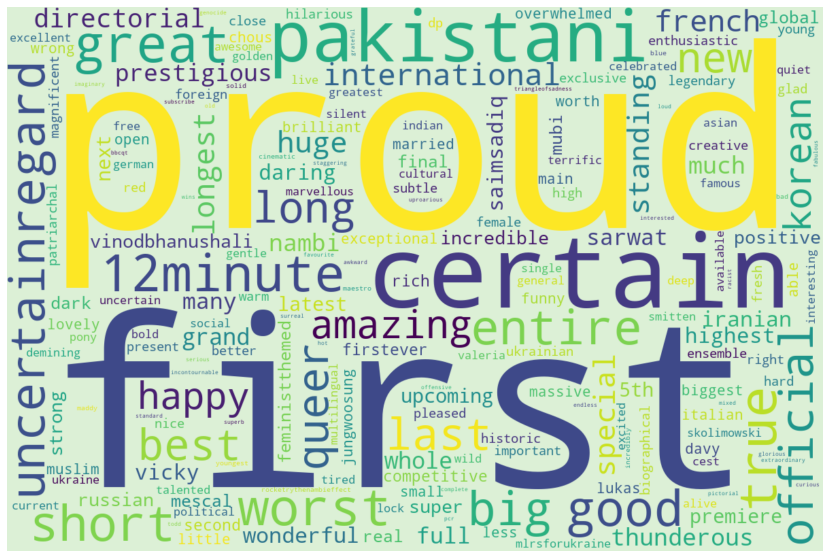

In [379]:
adj_list = [token.text.lower() for doc in df_movie_cleaned[df_movie_cleaned['topic_name']=='Joyland']['spacy_doc'] for token in doc if token.pos_=='ADJ' ]
text = " ".join(cat.split()[0] for cat in adj_list)
wordcloud = WordCloud(width=1200, height=800,collocations = False, background_color = '#dcf0d6').generate(text)
# Display the generated Word Cloud
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)